In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

train_x_raw = pd.read_csv("train_x.csv")
train_y_raw = pd.read_csv("train_y.csv")
test_x_raw = pd.read_csv("test.csv")

# change dataframe to matrix
train_x = np.array(train_x_raw,dtype='int32')
train_y = np.array(train_y_raw,dtype='int32').reshape(len(train_y_raw),)

features = np.array(train_x_raw.columns)

Mind the input of x and y form.

In [4]:
# build a model
model = RandomForestClassifier(n_estimators=100,
                                random_state=0,
                                n_jobs=-1)
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [7]:
# here we see the importance
importances = model.feature_importances_

importances_df = DataFrame({"feature":features,
                            "importance":importances})
importances_df = importances_df.sort_values(["importance"],ascending=False)

 1) userID                         0.159138
 2) residence                      0.097029
 3) clickTime_day                  0.074731
 4) positionID                     0.063793
 5) residence_province             0.062501
 6) age.1                          0.057551
 7) age                            0.057541
 8) residence_city                 0.056649
 9) hometown_province              0.053011
10) education                      0.047570
11) hometown_city                  0.047466
12) clickTime_hour                 0.038141
13) telecomsOperator               0.032301
14) marriageStatus                 0.030137
15) creativeID                     0.028018
16) adID                           0.018675
17) haveBaby                       0.018002
18) camgaignID                     0.015578
19) gender                         0.012730
20) advertiserID                   0.008121
21) app_categories_second_class    0.007234
22) appID                          0.005853
23) connectionType              

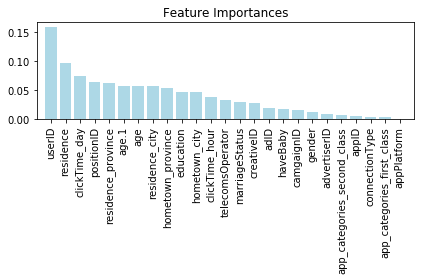

In [6]:
indices = np.argsort(importances)[::-1] # change order 
## plot the importance

for f in range(train_x.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            features[indices[f]], 
                            importances[indices[f]]))
plt.title('Feature Importances')
plt.bar(range(train_x.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(train_x.shape[1]), 
           features[indices], rotation=90)
plt.xlim([-1, train_x.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

You can also do grid search to find the best parameter.

In [ ]:
## grid search
param_grid = {
              'n_estimators': [10, 100, 500, 1000],
              'max_features':[0.6, 0.7, 0.8, 0.9]
             }

rf = RandomForestClassifier()
rfc = GridSearchCV(rf, param_grid, scoring = 'neg_log_loss', cv=3, n_jobs=2)
rfc.fit(train_x,train_y)
print(rfc.best_score_)
print(rfc.best_params_)